# Install dependencies

In [5]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data cleaning and handling missing values

In [6]:
import pandas as pd
import numpy as np

# 2. Load the dataset from the 'data' folder
file_path = "../data/marketing_campaign1.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)

In [7]:
# 3. Quick EDA - Display the first few rows
print("Dataset Preview:")
display(df.head())


Dataset Preview:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
# 4. Check for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display missing values information
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print("\nMissing Values in Each Column:")
display(missing_data[missing_data['Missing Values'] > 0])



Missing Values in Each Column:


,Missing Values,Percentage
Income,24,1.071429


In [9]:
# 5. Handle Missing Values
# Drop columns with more than 50% missing values
threshold = 50  # Set threshold for missing percentage
cols_to_drop = missing_data[missing_data['Percentage'] > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns with more than {threshold}% missing values: {list(cols_to_drop)}")

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing values handled successfully!")


Dropped columns with more than 50% missing values: []

Missing values handled successfully!


In [10]:


# 6. Summary Statistics after handling missing values
print("\nDataset Summary:")
display(df.describe(include='all'))


Dataset Summary:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:

# Check missing values
print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


# Outlier detection and removing using Zscore with threshold of 2

In [45]:
from scipy.stats import zscore

# Assuming df is the DataFrame you already have (which is cleaned and missing values handled)

# Select numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for numerical columns
z_scores = zscore(numerical_columns)

# Get absolute Z-scores
abs_z_scores = abs(z_scores)

# Set threshold for Z-scores (commonly 3)
outliers = (abs_z_scores > 3)

# Remove rows where any column's Z-score is greater than 3 (outliers)
df_cleaned = df[~outliers.any(axis=1)]

# Print the cleaned dataset summary statistics to prove it is outlier-free
print(df_cleaned.describe())


                 ID   Year_Birth  ...  Total_Children  Spending_Per_Child
count   1114.000000  1114.000000  ...     1114.000000         1114.000000
mean    5596.696589  1969.957810  ...        1.268402         1102.459010
min        9.000000  1940.000000  ...        0.000000            2.657807
25%     2862.750000  1962.000000  ...        1.000000           33.663366
50%     5464.500000  1971.000000  ...        1.000000           75.247525
75%     8372.750000  1978.000000  ...        2.000000          280.310699
max    11191.000000  1996.000000  ...        3.000000        39700.000000
std     3228.785712    11.014285  ...        0.670752         4184.238705

[8 rows x 37 columns]


C:\Users\Digits\AppData\Local\Temp\ipykernel_25464\3023708949.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(numerical_columns)


In [48]:
from scipy.stats import zscore

# Assuming df is the DataFrame you already have (which is cleaned and missing values handled)

# Select numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for numerical columns
z_scores = zscore(numerical_columns)

# Get absolute Z-scores
abs_z_scores = abs(z_scores)

# Set threshold for Z-scores (commonly 2 instead of 3 to keep more data)
outliers = (abs_z_scores > 2)

# Print the Z-scores to check
print("Z-scores for the numerical columns:")
print(z_scores)

# Identify outliers
outlier_rows = df[outliers.any(axis=1)]

# Print the number of outliers before removing them
print(f"Number of outliers in the original dataset: {len(outlier_rows)}")

# Remove rows where any column's Z-score is greater than 2 (outliers)
df_cleaned = df[~outliers.any(axis=1)]

# Print the cleaned dataset summary statistics to prove it is outlier-free
print("Cleaned DataFrame Description (No outliers):")
print(df_cleaned.describe())


Z-scores for the numerical columns:
[[-1.04678844 -1.34165465  0.35355874 ...  1.34165465  1.14137822
  -0.25847829]
 [ 0.19332767  1.28083789 -0.9161246  ... -1.28083789 -0.31921639
  -0.25528687]
 [ 0.19178062  1.36825431 -0.47729811 ... -1.36825431 -0.31921639
  -0.24589864]
 ...
 [-0.48149599 -2.040986    1.49252233 ...  2.040986    2.60197284
  -0.24751864]
 [ 0.52996598  1.01858864  1.0391929  ... -1.01858864 -1.77981101
   6.02436792]
 [ 1.19055677 -1.34165465  0.77414377 ...  1.34165465  1.14137822
  -0.25258145]]
Number of outliers in the original dataset: 675
Cleaned DataFrame Description (No outliers):
                 ID   Year_Birth  ...  Total_Children  Spending_Per_Child
count    748.000000   748.000000  ...      748.000000          748.000000
mean    5700.677807  1971.228610  ...        1.225936          686.783803
min        9.000000  1947.000000  ...        0.000000            4.477612
25%     2854.750000  1964.000000  ...        1.000000           28.624206
50%     5

C:\Users\Digits\AppData\Local\Temp\ipykernel_25464\1626693525.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(numerical_columns)


C:\Users\Digits\AppData\Local\Temp\ipykernel_25464\2009061749.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))


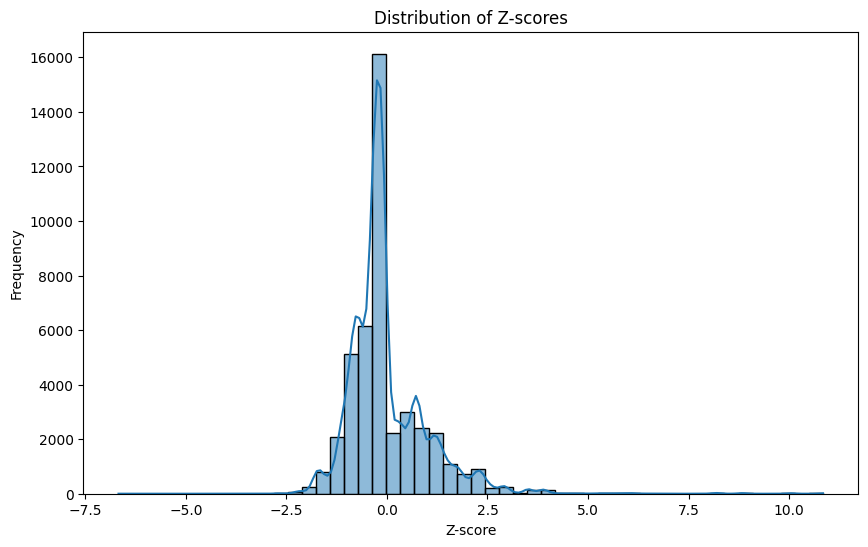

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already cleaned and missing values are handled

# Calculate Z-scores for numerical columns
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Plot the Z-scores distribution to see how many extreme values are present
plt.figure(figsize=(10, 6))
sns.histplot(z_scores.flatten(), bins=50, kde=True)
plt.title('Distribution of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()



# Feature engineering (Converting categorical into numerical)

### Check the Categorical data

In [52]:
# Assuming df is the DataFrame with your dataset

# Select only categorical columns (columns with data type 'object')
categorical_data = df.select_dtypes(include=['object'])

# Print the categorical columns
print(categorical_data)


       Education Marital_Status
1     Graduation         Single
3     Graduation       Together
7            PhD        Married
8            PhD       Together
9            PhD       Together
...          ...            ...
2232  Graduation         Single
2234  Graduation        Married
2236         PhD       Together
2237  Graduation       Divorced
2239         PhD        Married

[1423 rows x 2 columns]


### Apply  one hot encoding 

In [53]:
import pandas as pd

# Assuming df is the DataFrame with missing values handled and outliers removed

# Example of categorical columns in your dataset (replace with actual column names)
categorical_columns = ['Education', 'Marital_Status']  
# One-Hot Encoding for categorical columns without ordinal relationship
df_one_hot = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Alternatively, if you have ordinal data, use Label Encoding (for example, Education with an inherent order)
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Example: Apply label encoding to 'Education' if it's ordinal (you can adjust as needed)
# df['Education'] = label_encoder.fit_transform(df['Education'])

# Print the updated dataframe to show the result
print(df_one_hot.describe())


                 ID   Year_Birth  ...  Total_Children  Spending_Per_Child
count   1423.000000  1423.000000  ...     1423.000000         1423.000000
mean    5557.173577  1969.347857  ...        1.218552         3175.542114
min        1.000000  1893.000000  ...        0.000000            2.657807
25%     2864.500000  1961.000000  ...        1.000000           37.623762
50%     5407.000000  1971.000000  ...        1.000000          104.950495
75%     8313.500000  1977.000000  ...        2.000000          423.267327
max    11191.000000  1996.000000  ...        3.000000        80175.000000
std     3233.091649    11.443520  ...        0.684893        12237.859361

[8 rows x 37 columns]


### Check the final data set

In [59]:
# Assuming df_final is the final dataset after processing

# Check for categorical columns in the final dataset
categorical_columns_final = df_final.select_dtypes(include=['object'])

# Print the categorical columns (if any)
print("Categorical columns in the final dataset:")
print(categorical_columns_final)


Categorical columns in the final dataset:
Empty DataFrame
Columns: []
Index: [1, 3, 7, 10, 13, 14, 16, 25, 26, 30, 35, 37, 38, 41, 42, 47, 57, 58, 59, 66, 71, 75, 80, 81, 82, 85, 91, 93, 94, 95, 97, 100, 101, 105, 106, 108, 115, 118, 119, 123, 127, 128, 134, 139, 153, 156, 162, 169, 170, 171, 173, 177, 180, 181, 183, 184, 185, 186, 189, 194, 195, 204, 208, 218, 223, 225, 229, 232, 233, 235, 236, 242, 245, 250, 251, 255, 258, 262, 263, 265, 269, 272, 273, 274, 284, 285, 291, 294, 296, 297, 300, 302, 303, 304, 309, 310, 314, 315, 316, 318, ...]

[748 rows x 0 columns]


### After encoding you can see catergorical convert into true or false which means 0 or 1 

In [60]:
# Print the first few rows of the final dataset to confirm One-Hot Encoding
print(df_final.head())


      ID  Year_Birth  ...  Marital_Status_Widow  Marital_Status_YOLO
1   2174        1954  ...                 False                False
3   6182        1984  ...                 False                False
7   6177        1985  ...                 False                False
10  1994        1983  ...                 False                False
13  8180        1952  ...                 False                False

[5 rows x 47 columns]
